# Downloading Data

In [ ]:
# Importing pandas library, Matplotlib.pyplot, Numpy, Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URL address
url = 'https://drive.google.com/file/d/1zzZcI6LYPxiM-d7kFQVJfIgOLCPhAb0u/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

In [ ]:
# The JSON file format
data_a = pd.read_json(path, orient='split')
# Data view
data_a

,0,1,2,3,4,5,6,7,8,9,10
0,1,b,30.83,u,w,v,1.25,t,f,g,00202
1,2,a,58.67,u,q,h,3.04,t,f,g,00043
2,3,a,24.50,u,q,h,1.50,f,f,g,00280
3,4,b,27.83,None,w,v,3.75,t,t,g,00100
4,5,b,20.17,u,w,v,1.71,f,f,s,00120
...,...,...,...,...,...,...,...,...,...,...,...
685,686,b,21.08,y,e,h,1.25,f,f,g,00260
686,687,a,22.67,u,c,v,2.00,t,t,g,00200
687,688,a,25.25,y,ff,ff,2.00,t,t,g,00200
688,689,b,17.92,u,aa,v,0.04,f,f,g,00280


In [ ]:
# URL address - bank info
url = 'https://drive.google.com/file/d/1i7BrkHu5C4qA3QnM7b8QIbPonjSlBrhA/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

In [ ]:
# The 2nd JSON file format (bank info)
data_b = pd.read_json(path, orient = 'split')
# Data view
data_b

,0,1,2,3,4,5,6
0,1,0.000,g,t,1,0,+
1,2,4.460,g,t,6,560,+
2,3,0.500,g,t,0,824,+
3,4,1.540,g,t,5,3,+
4,5,5.625,g,t,0,0,+
...,...,...,...,...,...,...,...
685,686,10.085,p,f,0,0,-
686,687,0.750,g,f,2,394,-
687,688,13.500,p,f,1,1,-
688,689,0.205,g,f,0,750,-


# Data Preparation

## Data Merge

Column 0 is unique ID of the client, which we will use for the merge.

In [ ]:
# 2 DataFrames merge
data_c = pd.merge(data_a,
                  data_b,
                  on = 0, 
                  how = 'inner')
# Result
data_c

,0,1_x,2_x,3_x,4_x,5_x,6_x,7,8,9,10,1_y,2_y,3_y,4_y,5_y,6_y
0,1,b,30.83,u,w,v,1.25,t,f,g,00202,0.000,g,t,1,0,+
1,2,a,58.67,u,q,h,3.04,t,f,g,00043,4.460,g,t,6,560,+
2,3,a,24.50,u,q,h,1.50,f,f,g,00280,0.500,g,t,0,824,+
3,4,b,27.83,None,w,v,3.75,t,t,g,00100,1.540,g,t,5,3,+
4,5,b,20.17,u,w,v,1.71,f,f,s,00120,5.625,g,t,0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,686,b,21.08,y,e,h,1.25,f,f,g,00260,10.085,p,f,0,0,-
692,687,a,22.67,u,c,v,2.00,t,t,g,00200,0.750,g,f,2,394,-
693,688,a,25.25,y,ff,ff,2.00,t,t,g,00200,13.500,p,f,1,1,-
694,689,b,17.92,u,aa,v,0.04,f,f,g,00280,0.205,g,f,0,750,-


In [ ]:
# Column Rename
data_c.rename({0:"id", 
               "1_x":"gender",
               "2_x":"age",
               "3_x":"marital_st",
               "4_x":"industry",
               "5_x":"ethnicity",
               "6_x":"years_employed",
               7:"employed",
               8:"driver",
               9:"citizen",
               10:"zip",
               "1_y":"debt",
               "2_y":"bank_account",
               "3_y":"prior_insolvency",
               "4_y":"credit_score",
               "5_y":"income",
               "6_y":"cc_approved"}, 
              axis=1,
              inplace=True)

In [ ]:
# Data Frame Renamed
data_c.head(5)

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
0,1,b,30.83,u,w,v,1.25,t,f,g,00202,0.000,g,t,1,0,+
1,2,a,58.67,u,q,h,3.04,t,f,g,00043,4.460,g,t,6,560,+
2,3,a,24.50,u,q,h,1.50,f,f,g,00280,0.500,g,t,0,824,+
3,4,b,27.83,None,w,v,3.75,t,t,g,00100,1.540,g,t,5,3,+
4,5,b,20.17,u,w,v,1.71,f,f,s,00120,5.625,g,t,0,0,+


In [ ]:
# Duplicates in ID column
data_c.duplicated(subset = 'id').sum()

9

In [ ]:
# Unique values in ID column
data_c.id.nunique()


687

In [ ]:
# Odstránenie duplikátov
data_c.drop_duplicates(inplace = True)
# Check - no duplicates in ID column
data_c.duplicated(subset = 'id').sum()

0

## Data Mapping

In [ ]:
# Count unique values in every column
data_c.nunique()

id                  687
gender                3
age                 349
marital_st            4
industry             15
ethnicity            10
years_employed      131
employed              2
driver                2
citizen               3
zip                 171
debt                214
bank_account          4
prior_insolvency      2
credit_score         23
income              240
cc_approved           2
dtype: int64

The check of unique values in these columns for mapping:

*   gender
*   married
*   industry
*   ethnicity
*   employed
*   driver
*   citizen
*   bank_customer
*   prior_insolvency
*   cc_approved

In [ ]:
# Unique values in 'gender' column
data_c.gender.unique()

array(['b', 'a', '?'], dtype=object)

In [ ]:
# Unique values in 'married' column
data_c.marital_st.unique()

array(['u', None, 'y', '?', 'l'], dtype=object)

In [ ]:
# Unique values in 'industry' column
data_c.industry.unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'ff', 'aa',
       'j', '?'], dtype=object)

In [ ]:
# Unique values in 'ethnicity' column
data_c.ethnicity.unique()

array(['v', 'h', 'bb', None, 'ff', 'j', 'z', '?', 'o', 'dd', 'n'],
      dtype=object)

In [ ]:
# Unique values in 'employed' column
data_c.employed.unique()

array(['t', 'f'], dtype=object)

In [ ]:
# Unique values in 'driver' column
data_c.driver.unique()

array(['f', 't'], dtype=object)

In [ ]:
# Unique values in 'citizen' column
data_c.citizen.unique()

array(['g', 's', 'p'], dtype=object)

In [ ]:
# Unique values in 'bank_customer' column
data_c.bank_account.unique()

array(['g', 'p', None, '?', 'gg'], dtype=object)

In [ ]:
# Unique values in 'prior_insolvency' column
data_c.prior_insolvency.unique()

array(['t', 'f'], dtype=object)

In [ ]:
# Unique values in 'cc_approved' column
data_c.cc_approved.unique()

array(['+', '-'], dtype=object)

In [ ]:
# Unique values in 'age' column
data_c.age.unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '42.00', '49.50', '36.75', '22.58', '27.25', '23.00',
       '27.75', '54.58', '34.17', '28.92', '29.67', '39.58', '56.42',
       '54.33', '41.00', '31.92', '41.50', '23.92', '25.75', '26.00',
       '37.42', '34.92', '34.25', '23.33', '23.17', '44.33', '35.17',
       '43.25', '56.75', '31.67', '20.42', '26.67', '36.00', '25.50',
       '19.42', '32.33', '34.83', '38.58', '44.25', '44.83', '20.67',
       '34.08', '21.67', '21.50', '49.58', '27.67', '39.83', '?', '37.17',
       '25.67', '34.00', '49.00', '62.50', '31.42', '52.33', '28.75',
       '28.58', '22.50', '28.50', '37.50', '35.25', '18.67', '54.83',
       '40.92', '19.75', '29.17', '24.58', '33.75', '25.42', '37.75',
       '52.50',

In [ ]:
# Unique values in 'zip' column
data_c.zip.unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00434',
       '00583', '00030', '00240', '00070', '00455', '00311', '00216',
       '00491', '00400', '00239', '00160', '00711', '00250', '00520',
       '00515', '00420', '?', '00980', '00443', '00140', '00094', '00368',
       '00288', '00928', '00188', '00112', '00171', '00268', '00167',
       '00075', '00152', '00176', '00329', '00212', '00410', '00274',
       '00375', '00408', '00350', '00204', '00040', '00181', '00399',
       '00440', '00093', '00060', '00395', '00393', '00021', '00029',
       '00102', '00431', '00370', '00024', '00020', '00129', '00510',
       '00195', '00144', '00380', '00049', '00050', '00381', '00150',
       '00117', '00056', '00211', '00230', '00156', '00022', '00228',
       '00519', '00253', '00487', '00220', '00088', '00073', '00121',
       '00470',

In [ ]:
data_d = data_c.copy()

In [ ]:
# Gender mapping
mapping_gender = {'b' : 'b',
                  'a' : 'a'}
data_d['gender'] = data_d['gender'].map(mapping_gender)

In [ ]:
# Marital status mapping
mapping_marital = {'u' : 'married',
                   'y' : 'single',
                   'l' : 'divorced'}
data_d['marital_st'] = data_d['marital_st'].map(mapping_marital)

In [ ]:
# Industry mapping
mapping_industry = {'w' : 'industrials',
                    'q' : 'materials',
                    'm' : 'communication_services',
                    'r' : 'transport',
                    'cc' : 'it',
                    'k' : 'financials',
                    'c' : 'energy',
                    'd' : 'real_estate',
                    'x' : 'utilities',
                    'i' : 'consumer_discretionary',
                    'e' : 'education',
                    'ff' : 'healthcare',
                    'aa' : 'consumer_staples',
                    'j' : 'research'}
data_d['industry'] = data_d['industry'].map(mapping_industry)

In [ ]:
# ethnicity mapping
mapping_ethnicity = {'v' : 'white',
                     'h' : 'black',
                     'bb' : 'asian',
                     'ff' : 'latino',
                     'j' : 'others',
                     'z' : 'others',
                     'o' : 'others', 
                     'dd' : 'others', 
                     'n' : 'others'}
data_d['ethnicity'] = data_d['ethnicity'].map(mapping_ethnicity)

In [ ]:
# Employment mapping
mapping_emp = {'t' : 'yes',
               'f' : 'no'}
data_d['employed'] = data_d['employed'].map(mapping_emp)

In [ ]:
# Driver license mapping
mapping_drive = {'f' : 'no',
                 't' : 'yes'}
data_d['driver'] = data_d['driver'].map(mapping_drive)

In [ ]:
# Citizenship mapping
mapping_cit = {'g' : 'born',
               's' : 'others',
               'p' : 'temporary'}
data_d['citizen'] = data_d['citizen'].map(mapping_cit)

In [ ]:
# Bank customer mapping
mapping_bank = {'g' : 'yes',
                'p' : 'no'}
data_d['bank_account'] = data_d['bank_account'].map(mapping_bank)

In [ ]:
# Prior insolvency mapping
mapping_ins = {'t' : 'yes',
               'f' : 'no'}
data_d['prior_insolvency'] = data_d['prior_insolvency'].map(mapping_ins)

In [ ]:
# Credit card approval mapping
mapping_cc = {'+' : 'yes',
              '-' : 'no'}
data_d['cc_approved'] = data_d['cc_approved'].map(mapping_cc)

## Data Types

In [ ]:
data_e = data_d.copy()

In [ ]:
data_e.dtypes

id                    int64
gender               object
age                  object
marital_st           object
industry             object
ethnicity            object
years_employed      float64
employed             object
driver               object
citizen              object
zip                  object
debt                float64
bank_account         object
prior_insolvency     object
credit_score          int64
income                int64
cc_approved          object
dtype: object

In [ ]:
# Lines with '?' in column age
data_e[data_e['age'] == '?']

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
87,84,a,?,married,real_estate,white,3.000,no,yes,born,00300,3.500,yes,yes,0,0,no
90,87,b,?,married,real_estate,white,0.875,no,yes,others,00928,0.375,yes,yes,0,0,no
96,93,b,?,single,consumer_staples,white,8.500,no,no,born,00000,5.000,no,yes,0,0,no
101,98,b,?,married,energy,asian,0.835,no,yes,others,00320,0.500,yes,yes,0,0,no
258,255,b,?,married,financials,white,0.250,no,no,born,00380,0.625,yes,no,0,2010,no
290,287,a,?,married,healthcare,latino,0.000,yes,yes,born,00200,1.500,yes,no,2,105,no
333,330,b,?,single,consumer_discretionary,white,0.085,no,yes,born,00411,4.000,no,no,0,0,no
449,446,a,?,married,healthcare,latino,0.000,no,no,born,?,11.250,yes,no,0,5200,no
454,451,b,?,single,consumer_discretionary,asian,7.000,no,no,born,00000,3.000,no,no,0,1,no
504,501,b,?,married,utilities,white,5.000,yes,yes,born,00290,4.000,yes,yes,3,2279,yes


In [ ]:
# Age data convert from object to number
data_e['age'] = pd.to_numeric(data_e['age'], errors = 'coerce')

## Missing values

In [ ]:
# Lines with '?' in column zip
data_e[data_e['zip'] == '?']

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
75,72,b,34.83,married,real_estate,asian,12.500,no,yes,born,?,4.000,yes,yes,0,0,no
206,203,b,24.83,married,energy,white,2.250,yes,no,born,?,2.750,yes,yes,6,600,yes
210,207,a,71.58,NaN,NaN,NaN,0.000,no,no,temporary,?,0.000,NaN,no,0,0,yes
247,244,a,18.75,married,materials,white,2.710,yes,no,born,?,7.500,yes,yes,5,26726,yes
274,271,b,37.58,NaN,NaN,NaN,0.000,no,no,temporary,?,0.000,NaN,no,0,0,yes
282,279,b,24.58,single,healthcare,latino,0.000,no,no,born,?,13.500,no,no,0,0,no
334,331,b,20.42,NaN,NaN,NaN,0.000,no,no,temporary,?,0.000,NaN,no,0,0,no
410,407,a,40.33,single,financials,white,0.165,yes,no,born,?,8.125,no,no,2,18,no
449,446,a,NaN,married,healthcare,latino,0.000,no,no,born,?,11.250,yes,no,0,5200,no
460,457,b,34.58,NaN,NaN,NaN,0.000,no,no,temporary,?,0.000,NaN,no,0,0,no


In [ ]:
# Zip column: replace ? with Nan
data_e.replace('?', np.nan, inplace = True)

In [ ]:
# Missing values - NaN
NA_count = data_e.isna().sum()

# Percentage of NaN (with LEN function)
percentage = NA_count / len(data_e) * 100

# Overview of Nan and NaN % in every column
missing_values = pd.concat([NA_count, percentage], keys = ['Total count','The percentage'], axis = 1).round(2)
# Zobrazenie výsledku
missing_values

,Total count,The percentage
id,0,0.00
gender,12,1.75
age,12,1.75
marital_st,21,3.06
industry,9,1.31
ethnicity,19,2.77
years_employed,0,0.00
employed,0,0.00
driver,0,0.00
citizen,0,0.00


In [ ]:
# Lines with NaN in column 'gender'
data_e[data_e['gender'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
252,249,NaN,24.50,married,energy,asian,4.750,yes,no,born,00073,12.750,yes,yes,2,444,yes
331,328,NaN,40.83,married,consumer_discretionary,asian,0.500,no,no,others,01160,3.500,yes,no,0,0,no
350,347,NaN,32.25,married,energy,white,0.250,no,yes,born,00372,1.500,yes,no,0,122,no
378,375,NaN,28.17,married,consumer_staples,white,0.040,no,no,born,00260,0.585,yes,no,0,1004,no
457,454,NaN,29.75,married,industrials,white,0.250,no,yes,born,00300,0.665,yes,no,0,0,no
483,480,NaN,26.50,single,NaN,NaN,0.085,no,no,others,00080,2.710,no,no,0,0,no
493,490,NaN,45.33,married,materials,white,0.125,no,yes,born,00263,1.000,yes,no,0,0,no
524,521,NaN,20.42,married,financials,white,1.500,yes,no,born,00160,7.500,yes,yes,1,234,yes
604,599,NaN,20.08,married,materials,white,1.000,yes,no,born,00240,0.125,yes,no,1,768,yes
607,602,NaN,42.25,single,NaN,NaN,0.000,no,yes,born,00150,1.750,no,no,0,1,no


In [ ]:
# Lines with NaN in column 'age'
data_e[data_e['age'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
87,84,a,NaN,married,real_estate,white,3.000,no,yes,born,00300,3.500,yes,yes,0,0,no
90,87,b,NaN,married,real_estate,white,0.875,no,yes,others,00928,0.375,yes,yes,0,0,no
96,93,b,NaN,single,consumer_staples,white,8.500,no,no,born,00000,5.000,no,yes,0,0,no
101,98,b,NaN,married,energy,asian,0.835,no,yes,others,00320,0.500,yes,yes,0,0,no
258,255,b,NaN,married,financials,white,0.250,no,no,born,00380,0.625,yes,no,0,2010,no
290,287,a,NaN,married,healthcare,latino,0.000,yes,yes,born,00200,1.500,yes,no,2,105,no
333,330,b,NaN,single,consumer_discretionary,white,0.085,no,yes,born,00411,4.000,no,no,0,0,no
449,446,a,NaN,married,healthcare,latino,0.000,no,no,born,NaN,11.250,yes,no,0,5200,no
454,451,b,NaN,single,consumer_discretionary,asian,7.000,no,no,born,00000,3.000,no,no,0,1,no
504,501,b,NaN,married,utilities,white,5.000,yes,yes,born,00290,4.000,yes,yes,3,2279,yes


In [ ]:
# Lines with NaN in column 'marital_st'
data_e[data_e['marital_st'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
3,4,b,27.83,NaN,industrials,white,3.750,yes,yes,born,00100,1.540,yes,yes,5,3,yes
11,12,b,29.92,NaN,energy,black,4.335,no,no,born,00260,1.835,yes,yes,0,200,yes
177,174,a,49.83,NaN,financials,black,8.500,no,yes,born,00000,13.585,yes,yes,0,0,yes
179,176,b,27.00,NaN,industrials,white,0.375,no,yes,born,00260,1.500,no,yes,0,1065,yes
210,207,a,71.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
242,239,b,42.83,NaN,materials,white,4.580,no,no,others,00000,4.625,yes,yes,0,0,yes
265,262,a,52.17,NaN,healthcare,latino,0.000,no,no,born,00000,0.000,no,no,0,0,no
274,271,b,37.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
279,276,b,18.58,NaN,real_estate,white,0.540,no,no,born,00120,5.710,yes,no,0,0,no
328,325,b,33.67,NaN,industrials,white,1.165,no,no,born,00120,1.250,yes,no,0,0,no


In [ ]:
# Lines with NaN in column 'industry'
data_e[data_e['industry'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
210,207,a,71.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,yes
274,271,b,37.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,yes
334,331,b,20.42,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,no
460,457,b,34.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,no
483,480,NaN,26.50,single,NaN,NaN,0.085,no,no,others,00080,2.71,no,no,0,0,no
543,540,b,80.25,married,NaN,NaN,0.540,no,no,born,00000,5.50,yes,yes,0,340,no
598,593,b,23.17,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,yes
607,602,NaN,42.25,single,NaN,NaN,0.000,no,yes,born,00150,1.75,no,no,0,1,no
628,623,a,25.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.00,NaN,no,0,0,yes


In [ ]:
# Lines with NaN in column 'ehnicity'
data_e[data_e['ethnicity'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
39,38,a,23.00,married,utilities,NaN,0.500,yes,yes,born,00300,11.750,yes,yes,2,551,yes
104,101,b,37.50,single,energy,NaN,0.250,no,yes,born,00164,1.750,no,yes,0,400,no
112,109,b,40.92,single,utilities,NaN,10.000,no,yes,born,00176,2.250,no,yes,0,0,no
199,196,b,28.25,single,energy,NaN,1.500,yes,yes,born,00144,5.040,no,yes,8,7,yes
210,207,a,71.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
262,259,a,20.75,married,consumer_discretionary,NaN,0.040,no,no,born,00200,9.540,yes,no,0,1000,no
274,271,b,37.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
334,331,b,20.42,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,no
339,336,b,27.67,married,materials,NaN,0.165,no,yes,born,00220,0.750,yes,no,0,251,no
379,376,a,20.83,single,education,NaN,1.000,no,no,born,00260,0.500,no,no,0,0,no


In [ ]:
# Lines with NaN in column 'zip'
data_e[data_e['zip'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
75,72,b,34.83,married,real_estate,asian,12.500,no,yes,born,NaN,4.000,yes,yes,0,0,no
206,203,b,24.83,married,energy,white,2.250,yes,no,born,NaN,2.750,yes,yes,6,600,yes
210,207,a,71.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
247,244,a,18.75,married,materials,white,2.710,yes,no,born,NaN,7.500,yes,yes,5,26726,yes
274,271,b,37.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
282,279,b,24.58,single,healthcare,latino,0.000,no,no,born,NaN,13.500,no,no,0,0,no
334,331,b,20.42,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,no
410,407,a,40.33,single,financials,white,0.165,yes,no,born,NaN,8.125,no,no,2,18,no
449,446,a,NaN,married,healthcare,latino,0.000,no,no,born,NaN,11.250,yes,no,0,5200,no
460,457,b,34.58,NaN,NaN,NaN,0.000,no,no,temporary,NaN,0.000,NaN,no,0,0,no


In [ ]:
# Lines with NaN in column 'bank_account'
data_e[data_e['bank_account'].isna()]

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
86,83,b,39.83,married,communication_services,white,0.25,no,no,others,00288,0.500,NaN,yes,0,0,no
210,207,a,71.58,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
274,271,b,37.58,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
321,318,b,17.50,divorced,healthcare,others,0.00,no,yes,temporary,00450,22.000,NaN,no,0,100000,yes
325,322,a,18.08,divorced,it,latino,10.00,no,yes,others,00300,0.375,NaN,no,0,0,yes
334,331,b,20.42,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,no
460,457,b,34.58,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,no
467,464,a,36.58,married,healthcare,latino,0.00,yes,no,born,00200,0.290,NaN,no,10,18,no
598,593,b,23.17,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,yes
628,623,a,25.58,NaN,NaN,NaN,0.00,no,no,temporary,NaN,0.000,NaN,no,0,0,yes


In [ ]:
# Dropping NaN values
data_f = data_e.dropna()
data_f.isna().sum()

id                  0
gender              0
age                 0
marital_st          0
industry            0
ethnicity           0
years_employed      0
employed            0
driver              0
citizen             0
zip                 0
debt                0
bank_account        0
prior_insolvency    0
credit_score        0
income              0
cc_approved         0
dtype: int64

In [ ]:
data_g = data_f.copy()

In [ ]:
# Converting 'age' and 'years_employed' from float to integer
data_g = data_g.astype({'age' : 'int', 'years_employed' : 'int'})
data_g.dtypes

id                    int64
gender               object
age                   int64
marital_st           object
industry             object
ethnicity            object
years_employed        int64
employed             object
driver               object
citizen              object
zip                  object
debt                float64
bank_account         object
prior_insolvency     object
credit_score          int64
income                int64
cc_approved          object
dtype: object

In [ ]:
# Index reset
data_g.reset_index(drop = 'index', inplace = True)


# Data description

In [ ]:
data_g

,id,gender,age,marital_st,industry,ethnicity,years_employed,employed,driver,citizen,zip,debt,bank_account,prior_insolvency,credit_score,income,cc_approved
0,1,b,30,married,industrials,white,1,yes,no,born,00202,0.000,yes,yes,1,0,yes
1,2,a,58,married,materials,black,3,yes,no,born,00043,4.460,yes,yes,6,560,yes
2,3,a,24,married,materials,black,1,no,no,born,00280,0.500,yes,yes,0,824,yes
3,5,b,20,married,industrials,white,1,no,no,others,00120,5.625,yes,yes,0,0,yes
4,6,b,32,married,communication_services,white,2,no,yes,born,00360,4.000,yes,yes,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,686,b,21,single,education,black,1,no,no,born,00260,10.085,no,no,0,0,no
617,687,a,22,married,energy,white,2,yes,yes,born,00200,0.750,yes,no,2,394,no
618,688,a,25,single,healthcare,latino,2,yes,yes,born,00200,13.500,no,no,1,1,no
619,689,b,17,married,consumer_staples,white,0,no,no,born,00280,0.205,yes,no,0,750,no


## Categorical variable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Categorical variable`s overview
data_g.describe(include = 'object')

,gender,marital_st,industry,ethnicity,employed,driver,citizen,zip,bank_account,prior_insolvency,cc_approved
count,621,621,621,621,621,621,621,621,621,621,621
unique,2,2,14,5,2,2,3,161,2,2,2
top,b,married,energy,white,no,no,born,00000,yes,yes,no
freq,427,478,128,365,343,335,571,120,478,332,340


The most of the clients are gender b, are married, work in energy industy, are white, are born in the country. They have bank account, debt in bank and credit card wasn`t approved to them.

In [ ]:
# Gender %
data_g.gender.value_counts(normalize = True)*100

b    68.760064
a    31.239936
Name: gender, dtype: float64

69% of clients are gender b, 32% of clients are gender a.

In [ ]:
# Marital status %
data_g.marital_st.value_counts(normalize = True)*100

married    76.972625
single     23.027375
Name: marital_st, dtype: float64

The most clients (77%) are married, the rest (23%) of the clients are single.

In [ ]:
# Industry %
data_g.industry.value_counts(normalize = True)*100

energy                    20.611916
materials                 11.594203
industrials                9.661836
consumer_discretionary     8.534622
consumer_staples           8.051530
financials                 7.568438
healthcare                 7.407407
it                         6.119163
communication_services     5.797101
utilities                  4.830918
real_estate                4.025765
education                  3.703704
research                   1.610306
transport                  0.483092
Name: industry, dtype: float64

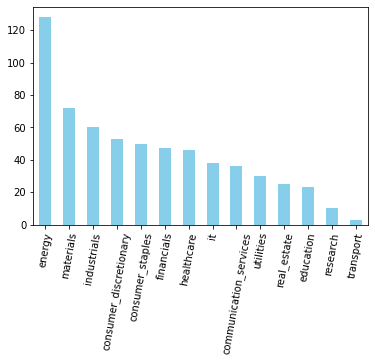

In [ ]:
# Overall view of the clients based on industry they are employed in
data_g.industry.value_counts().plot(kind='bar', 
                                   rot = 80, 
                                   color = 'skyblue');

Most of the clients (20%) work in energy industry and in materials industry (11%). The least clients (0.5%) work in transport.

In [ ]:
# Ethnicity %
data_g.ethnicity.value_counts(normalize = True)*100

white     58.776167
black     20.772947
asian      8.212560
latino     8.051530
others     4.186795
Name: ethnicity, dtype: float64

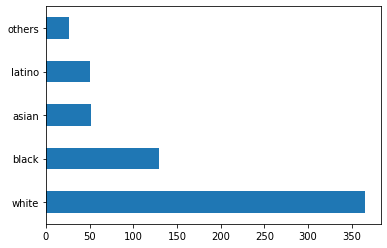

In [ ]:
# Overall view of the clients based on ethnicity they are employed in
data_g.ethnicity.value_counts().plot(kind='barh');

Most of the clients are white (59%) ethnicity, 21% clients are black, asians and latinos have the same ration 8% each and 4% of clients have other ethnicity.

In [ ]:
# Employment %
data_g.employed.value_counts(normalize = True)*100

no     55.233494
yes    44.766506
Name: employed, dtype: float64

55% of clients are employed and 45% of clients are unemployed.

In [ ]:
# Driver %
data_g.driver.value_counts(normalize = True)*100

no     53.94525
yes    46.05475
Name: driver, dtype: float64

54% clients have driver license, 46% of clients don`t drive the car.

In [ ]:
# Citizen %
data_g.citizen.value_counts(normalize = True)*100

born         91.948470
others        7.890499
temporary     0.161031
Name: citizen, dtype: float64

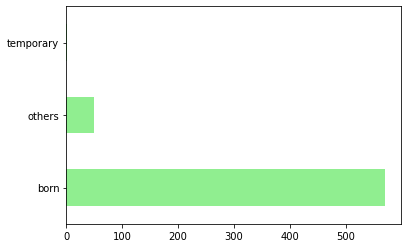

In [ ]:
# Overall view of the clients based on citizen they are employed in
data_g.citizen.value_counts().plot(kind='barh',  
                                   color = 'lightgreen');

91% Clients of bank are born in the country, 0.2% have temporary citizenship.

In [ ]:
# Bank_account %
data_g.bank_account.value_counts(normalize = True)*100

yes    76.972625
no     23.027375
Name: bank_account, dtype: float64

77% of clients have bank account.

In [ ]:
# Prior insolvency %
data_g.prior_insolvency.value_counts(normalize = True)*100

yes    53.462158
no     46.537842
Name: prior_insolvency, dtype: float64

53% of clients were insolved in the past.

In [ ]:
# Credit card approval %
data_g.cc_approved.value_counts(normalize = True)*100

no     54.750403
yes    45.249597
Name: cc_approved, dtype: float64

Credit card was denied to 55% of the clients.

## Numerical variable

In [ ]:
# Numerical column`s overview
data_g.describe()

,id,age,years_employed,debt,credit_score,income
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,344.724638,31.020934,1.946860,4.837198,2.553945,883.011272
std,200.407021,11.836570,3.326639,4.968713,5.048386,3623.183643
min,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,169.000000,22.000000,0.000000,1.040000,0.000000,0.000000
50%,346.000000,28.000000,1.000000,3.000000,0.000000,5.000000
75%,519.000000,38.000000,2.000000,7.500000,3.000000,396.000000
max,690.000000,76.000000,28.000000,28.000000,67.000000,51100.000000


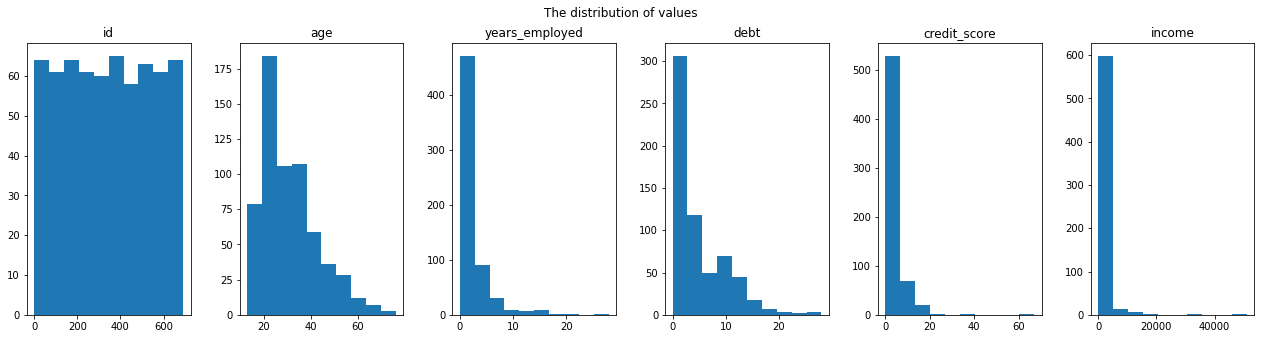

In [ ]:
# Distribution of all numerical columns
data_g.hist(layout = (1,6),                      
          grid = False,                          
          figsize = (22,5))                      
plt.suptitle('The distribution of values');      

The half of the clients are younger than 28 years, average age of the clients is 31 years, the oldest client is 77 years old and the youngest one is 14 years old.

The half of the clients were employed 1 year, average of them are employed 2 years, the longest epmployment period is 28 years.

The half of the clients have debt 3, 75% of them have debt 7.5, average debt is 4.8 and the maximal debt is 28.

Average credit score is 2.5, maximum credit score is 67.

Average income is 883, maximum income is 51100. Most of the clients have income below 10000.

# Visualizations

## Numerical variables

Which numerical variable has impact on decision if credit card is approved?

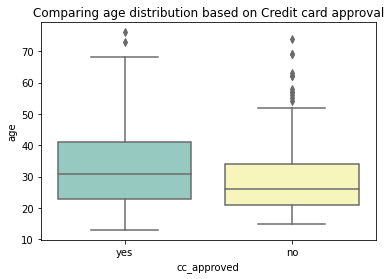

In [ ]:
# Boxplot for age based on CC approval
sns.boxplot(data = data_g, 
            x = 'cc_approved', 
            y = 'age',
            palette = 'Set3')
plt.title("Comparing age distribution based on Credit card approval");

Is the age the factor which affects the credit card approval? Yes - based on visualisation we see that median and third quartile of approved group is higher than third quartile of not approved group.

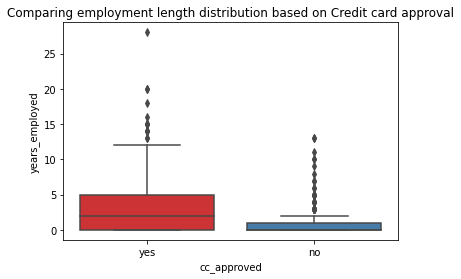

In [ ]:
# Boxplot for years employed based on CC approval
sns.boxplot(data = data_g, 
            x = 'cc_approved', 
            y = 'years_employed',
            palette = 'Set1')
plt.title("Comparing employment length distribution based on Credit card approval");

Employment lenght can have an impact on credit card approval based on this visualisaion - it`s for discussion with domain expert.

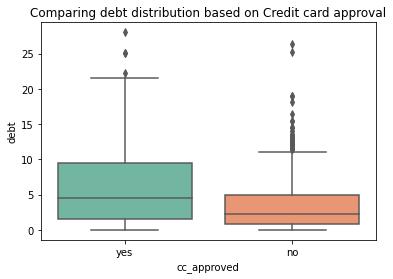

In [ ]:
# Boxplot for debt based on CC approval
sns.boxplot(data = data_g, 
            x = 'cc_approved', 
            y = 'debt',
            palette = 'Set2')
plt.title("Comparing debt distribution based on Credit card approval");

Similar for debt - it is ambigious if debt has an impact on credit card approval and it`s for discussion with domain expect to gather more insight. 

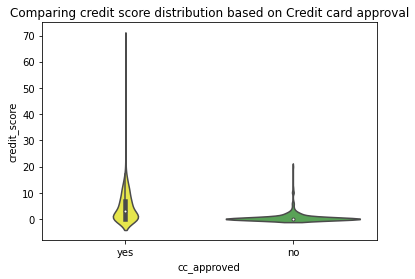

In [ ]:
# Boxplot for credit score based on CC approval
sns.violinplot(data = data_g, 
            x = 'cc_approved', 
            y = 'credit_score',
            palette = 'Set1_r')
plt.title("Comparing credit score distribution based on Credit card approval");

There is relationship between credit score and credit card approval. The higher credit score is, the higher posibility of credit card approval is. People with credit score over 30 will get the credit card. It is probably intern policy. This value can be calculated from other client`s data which are not known to us.

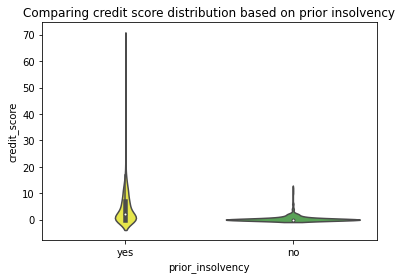

In [ ]:
# Boxplot for credit score based on CC approval
sns.violinplot(data = data_g, 
            x = 'prior_insolvency', 
            y = 'credit_score',
            palette = 'Set1_r')
plt.title("Comparing credit score distribution based on prior insolvency");

Even with the prior insolvency the client could get high credit score - it is the question for domain`s experts why clients with prior insolvency got higher credit score.

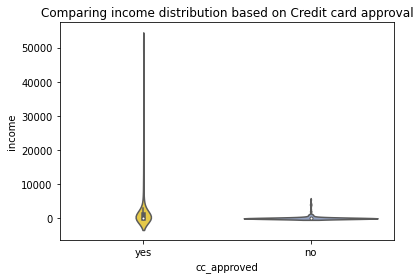

In [ ]:
# Boxplot for income based on CC approval
sns.violinplot(data = data_g, 
            x = 'cc_approved', 
            y = 'income',
            palette = 'Set2_r')
plt.title("Comparing income distribution based on Credit card approval");

In upper violin plot we can see that credit card approval is impacted by income. 

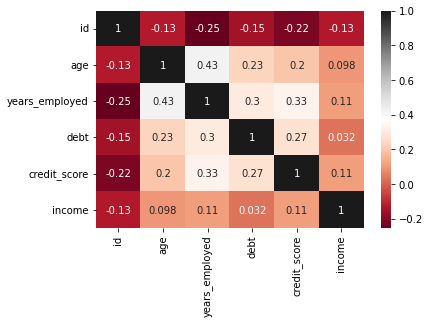

In [ ]:
# Correlation coeffcient
corr = data_g.corr()

sns.heatmap(corr,
            cmap = 'RdGy',
            annot = True);

The strongest relationship is between age nad the length of employment. The value of coefficent is 0.4, which means mild positive relationship between these two columns.

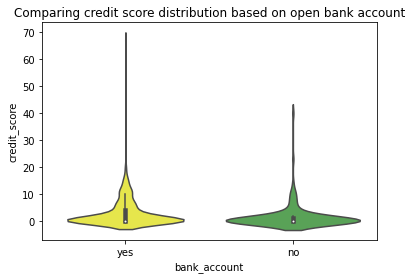

In [ ]:
# Boxplot for credit score based on CC approval
sns.violinplot(data = data_g, 
            x = 'bank_account', 
            y = 'credit_score',
            palette = 'Set1_r')
plt.title("Comparing credit score distribution based on open bank account");

Credit score is not deppendent on open bank account.

## Categorical variables

Which categoricla variable has impact on decision if credit card is approved?

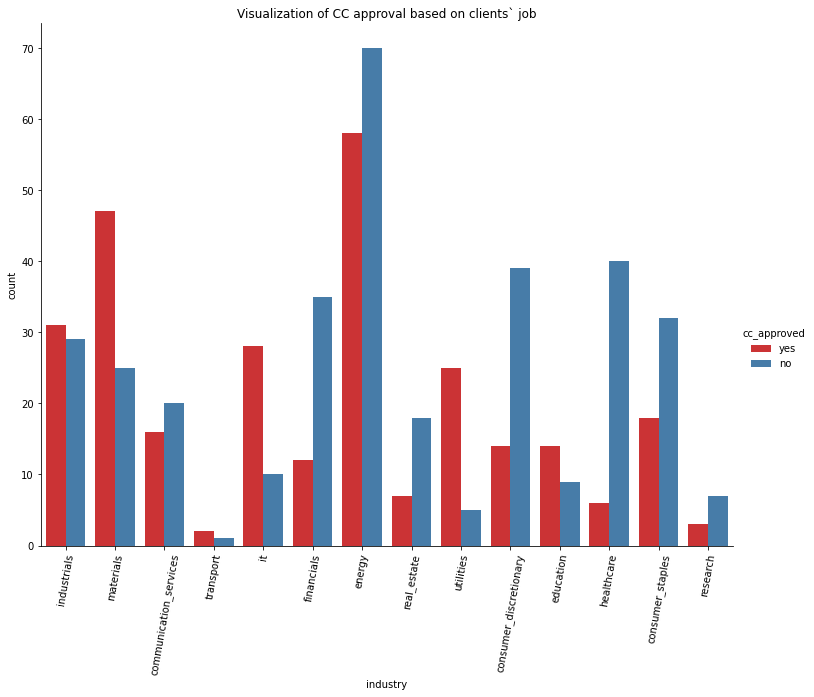

In [ ]:
# Catplot for industry and credit card approval
sns.catplot(data = data_g, 
            x = 'industry', 
            hue = 'cc_approved',
            kind = 'count',
            height = 8, 
            aspect = 1.3,
            palette = 'Set1')

plt.xticks(rotation = 80)
plt.title("Visualization of CC approval based on clients` job"  );

There is higher chance of credit card approval if client works in material sector, IT, utilities sector.

There is higher chance of credit card disapproval if client works in communication services, financial sector, energy industy, real estate, consumer dicretionary or healthcare.

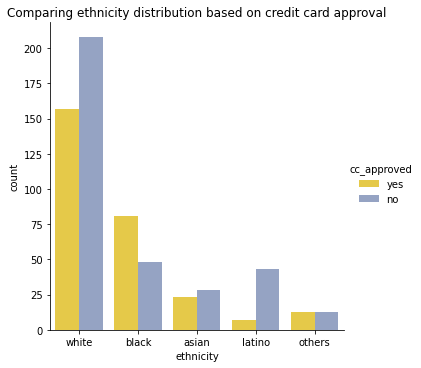

In [ ]:
# Histogram for ethnicity and credit card approval
sns.catplot(data = data_g, 
            x = 'ethnicity', 
            hue = 'cc_approved', 
            kind = 'count',
            palette = 'Set2_r')
plt.title("Comparing ethnicity distribution based on credit card approval");

It looks like ethnicity has an impact on credit card approval.

More than 50% of clients with white ethnicity has negative credit card approval.

For more than 50% of clients with black ethnicity was credit card approved.

Most clients with latino ethnicity haven`t got approval for credit card.

Clients with asian and other ethnicity have circa 50% chance of credi card approval.

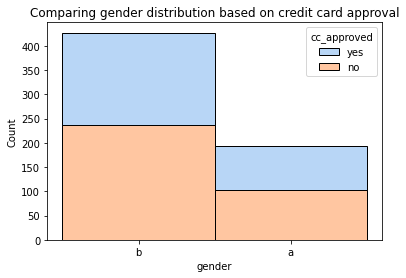

In [ ]:
# Histogram for gender and credit card approval
sns.histplot(data = data_g, 
            x = 'gender', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'pastel')
plt.title("Comparing gender distribution based on credit card approval");

There is no direct relationship between gender and credit card approval.

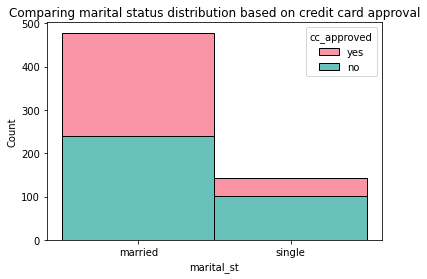

In [ ]:
# Histogram for marital status and credit card approval
sns.histplot(data = data_g, 
            x = 'marital_st', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'husl')
plt.title("Comparing marital status distribution based on credit card approval");

There is higher chance that credit card will not be approved if the client is single.

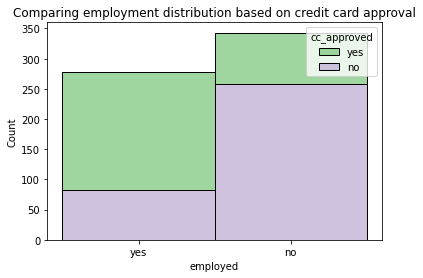

In [ ]:
# Histogram for employment and credit card approval
sns.histplot(data = data_g, 
            x = 'employed', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'Accent')
plt.title("Comparing employment distribution based on credit card approval");

There is higher chance that credict card will be approved when client is employed.

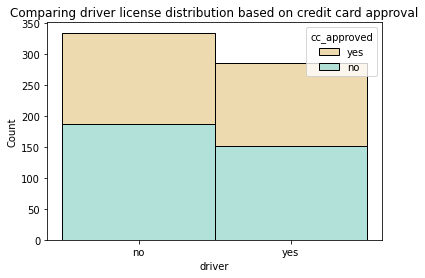

In [ ]:
# Histogram for driver and credit card approval
sns.histplot(data = data_g, 
            x = 'driver', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'BrBG')
plt.title("Comparing driver license distribution based on credit card approval");

There is no direct relationship between gender and credit card approval.

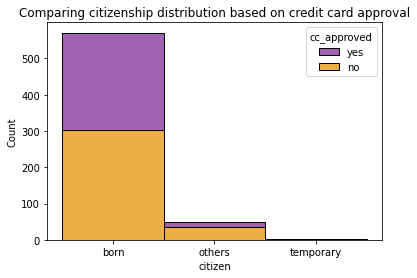

In [ ]:
# Histogram for citizenship and credit card approval
sns.histplot(data = data_g, 
            x = 'citizen', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'CMRmap')
plt.title("Comparing citizenship distribution based on credit card approval");

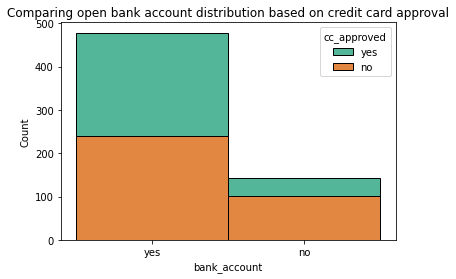

In [ ]:
# Histogram for bank account and credit card approval
sns.histplot(data = data_g, 
            x = 'bank_account', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'Dark2')
plt.title("Comparing open bank account distribution based on credit card approval");

There is higher chance that credict card will not be approved when client doen`t have open bank account.

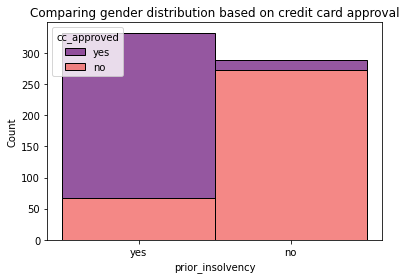

In [ ]:
# Histogram for prior_insolvency and credit card approval
sns.histplot(data = data_g, 
            x = 'prior_insolvency', 
            hue = 'cc_approved', 
            multiple = 'stack',
            palette = 'magma')
plt.title("Comparing gender distribution based on credit card approval");

Here I can see 3 hypothesis:
1. The credit card was approved although there was insolvency in the past and not approved if there was not prior insolvency.
2. The client got the credit card and then became insolvent.
3. The mapping of the source data is wrong.

This issue needs to be discussed with domain expert.

# Conclusion


How looks like average client who has approved credit card?
The average client who has approved credit card is white or black, married, employed, born in the country, works in IT, materials or utilities sector.
>
>
How looks like average client who has not approved credit card?
The average client who has not approved credit card has asian or latino ethnicity, is single, unemployed, don`t have opened bank account, works in financial sector or healthcare.